# California Residential Pricing Data 1990


## Import packages

In [17]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix


## Reading data

In [2]:
# reading data

residency = pd.read_csv(r"C:\Users\USP\AppData\Local\Temp\Temp1_housing.csv.zip\housing.csv")
residency.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Stats:

In [3]:
# details:

residency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
residency["median_house_value"].value_counts().head()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
Name: median_house_value, dtype: int64

In [5]:
residency["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
residency.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Plotting:

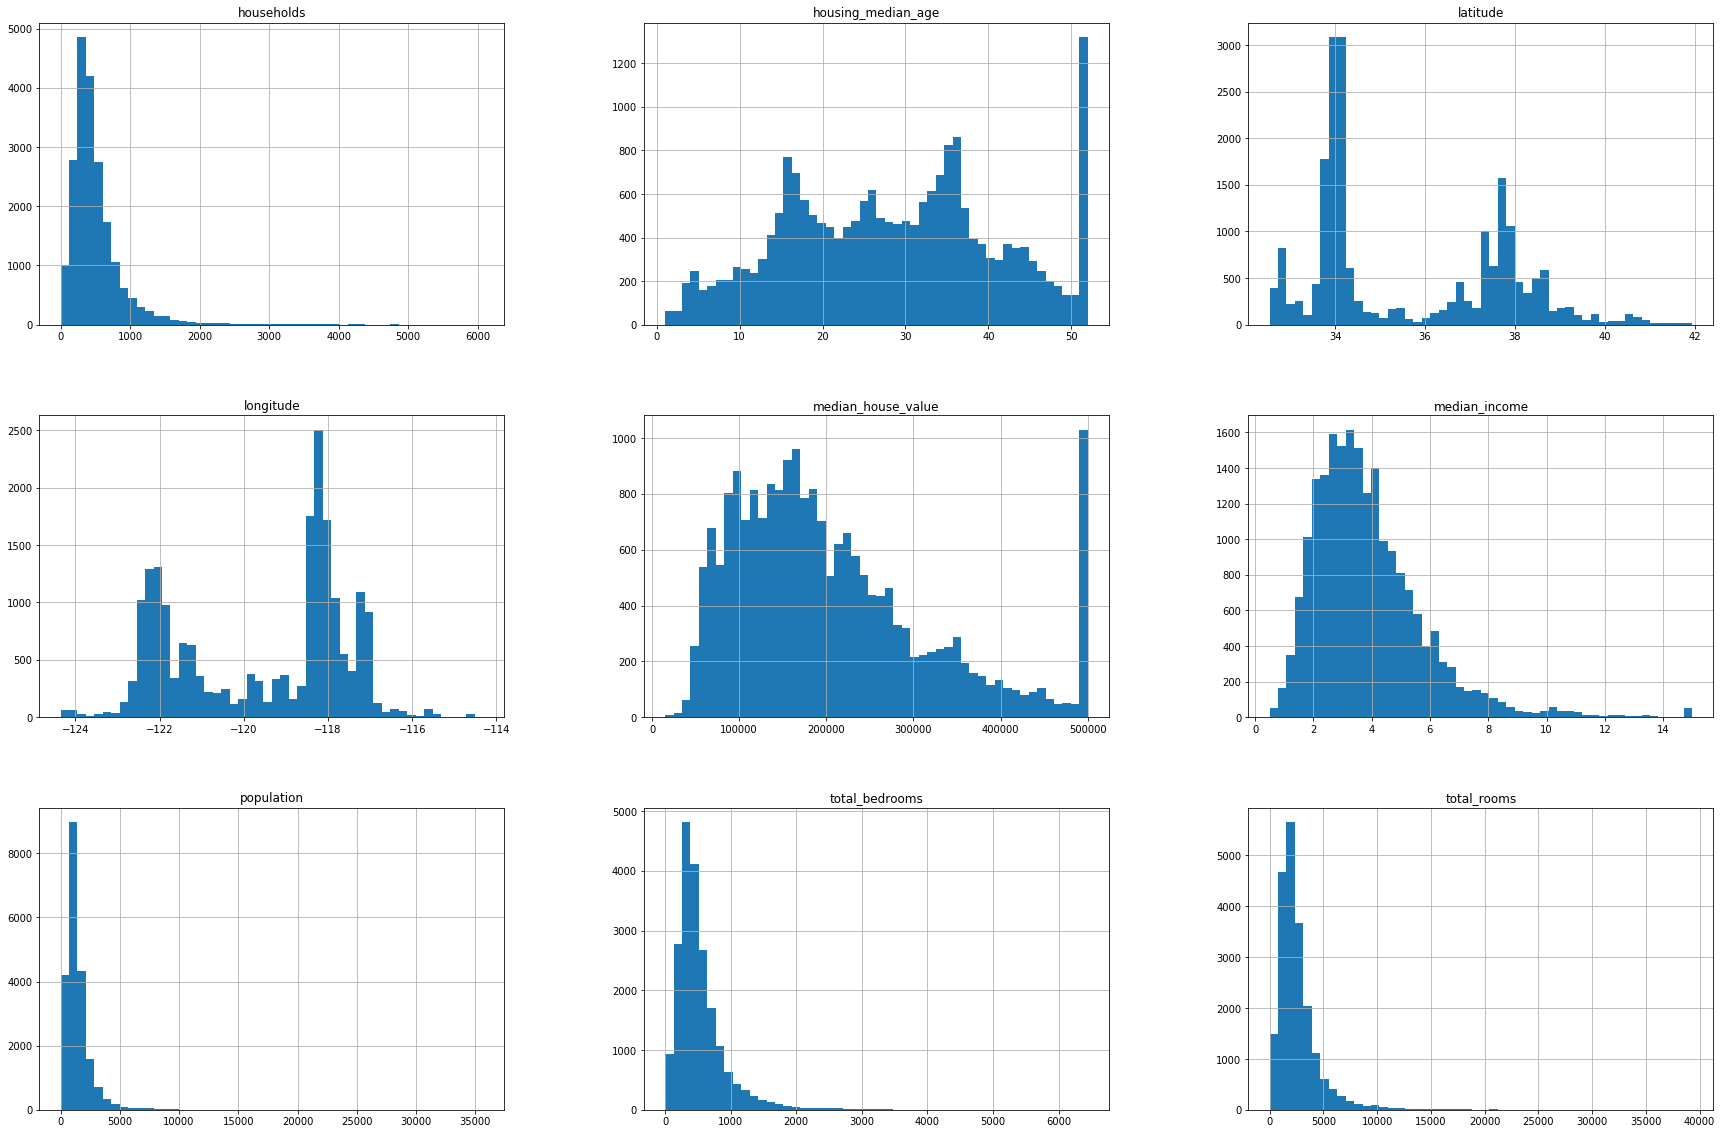

In [7]:
# plotting

residency.hist(bins = 50, figsize = (30, 20))
plt.show()

## Splitting Data:

In [8]:
# using scikit learn 

train_set, test_set = train_test_split(residency, test_size = 0.2, random_state = 42)
print(len(train_set))
print(len(test_set))


16512
4128


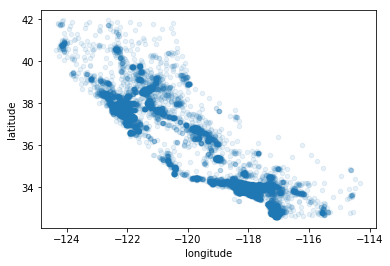

In [9]:
residency = train_set.copy()
residency.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

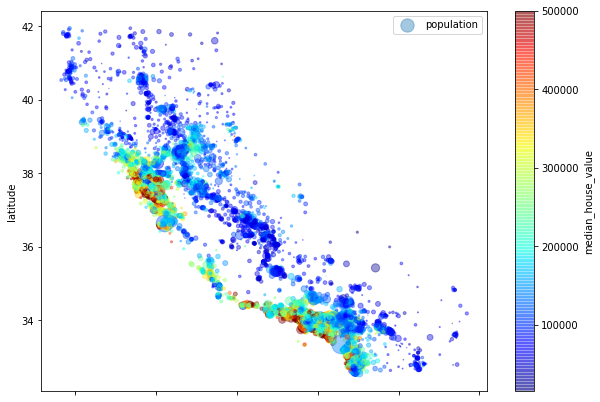

In [10]:
residency.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=residency["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

In [11]:
corr_matrix = residency.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C7C4D79B0>,
      dtype=object)

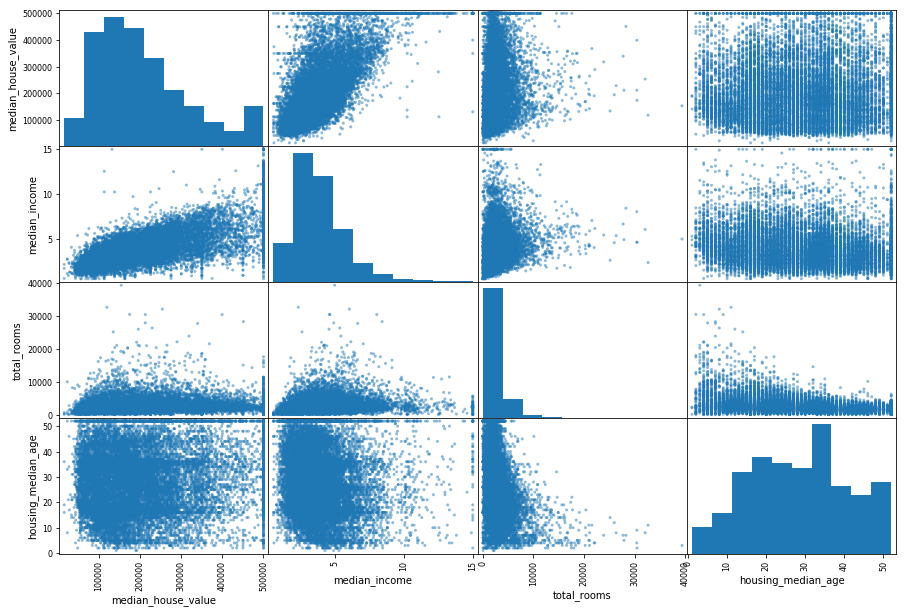

In [12]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(residency[attributes], figsize=(15,10))

In [13]:
residency["rooms_per_household"] = residency["total_rooms"] / residency["households"]
print(residency["rooms_per_household"].head())

residency["bedrooms_per_room"] = residency["total_bedrooms"] / residency["total_rooms"]
print(residency["bedrooms_per_room"].head())

residency["population_per_household"] = residency["population"] / residency["households"]
print(residency["population_per_household"].head())


14196    5.017657
8267     4.473545
17445    5.645833
14265    4.002817
2271     6.268421
Name: rooms_per_household, dtype: float64
14196    0.200576
8267     0.232703
17445    0.174486
14265    0.258269
2271     0.180940
Name: bedrooms_per_room, dtype: float64
14196    3.691814
8267     1.738095
17445    2.723214
14265    3.994366
2271     2.300000
Name: population_per_household, dtype: float64


In [14]:
corr_matrix = residency.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [15]:
residency = train_set.drop("median_house_value", axis=1)
residency_labels = train_set["median_house_value"].copy()